# <center> MATH&ML-10. Кластеризация и техники понижения размерности. Часть I
---

### 2. K-Means

In [1]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score

```Python
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
```
* `n_clusters` — количество кластеров;
* `n_init` — количество итераций алгоритма k-means;
* `random_state` — параметр для воспроизводимости результатов от запуска к запуску.

MINI-BATCH K-MEANS

```Python
# два кластера и подвыборки объёма 6

kmeans = MiniBatchKMeans(n_clusters=2,random_state=42,batch_size=6)
```

K-MEANS++

In [2]:
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

In [3]:
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

```Python
silhouette = []
for clust_num in range(2, 10):
    silhouette.append(get_silhouette(clust_num, X))
```

---

### 4. K-Means и EM-алгоритм: практика

* `gradyear` — год выпуска;
* `gender` — пол;
* `age` — возраст;
* `friends` — число друзей в социальной сети;
* `basketball`, `football`, `soccer`, `softball`, `volleyball`, `swimming`, `cheerleading`, `baseball`, `tennis`, `sports`, `cute`, `sex`, `sexy`, `hot`, `kissed`, `dance`, `band`, `marching`, `music`, `rock`, `god`, `church`, `jesus`, `bible`, `hair`, `dress`, `blonde`, `mall`, `shopping`, `clothes`, `hollister`, `abercrombie`, `die`, `death`, `drunk`, `drugs` (переменные с пятой по сороковую) — частота встречаемости соответствующих слов в сообщениях подростка.

In [4]:
# Задание 4.1
# Мы будем реализовывать алгоритм только на признаках, которые заключают в себе ключевые слова, встречающиеся в сообщениях подростка
# Удалите все остальные признаки. Какова размерность вашего текущего набора данных?
import pandas as pd

data = (pd.read_csv('data/snsdata.csv')
        .drop(['gradyear', 'gender', 'age', 'friends'], axis=1))
data.shape

(30000, 36)

In [5]:
# Задание 4.2
# Теперь нормализуйте данные с помощью StandardScaler()
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(data)

# Для получившейся матрицы нормализованных признаков выведите самое первое значение в самой первой строке (X_norm[0][0])
# Ответ округлите до двух знаков после точки-разделителя
round(X[0][0], 2)

-0.33

In [6]:
# Задание 4.3
# Реализуйте алгоритм k-means c девятью кластерами. В качестве значения параметра random_state возьмите число 42
from sklearn.cluster import KMeans

kmc = KMeans(n_clusters=9, random_state=42)
kmc.fit(X)

# Выведите получившееся значение инерции (model.inertia_). Ответ округлите до двух знаков после точки-разделителя
round(kmc.inertia_, 2)

856276.7

In [7]:
# Задание 4.4
# Сколько подростков относится к наиболее многочисленному кластеру?
# А сколько — к самому малочисленному?
y = kmc.labels_
pd.Series(y).value_counts()

1    19599
2     4284
0     2201
4      941
3      902
5      851
8      754
7      467
6        1
Name: count, dtype: int64

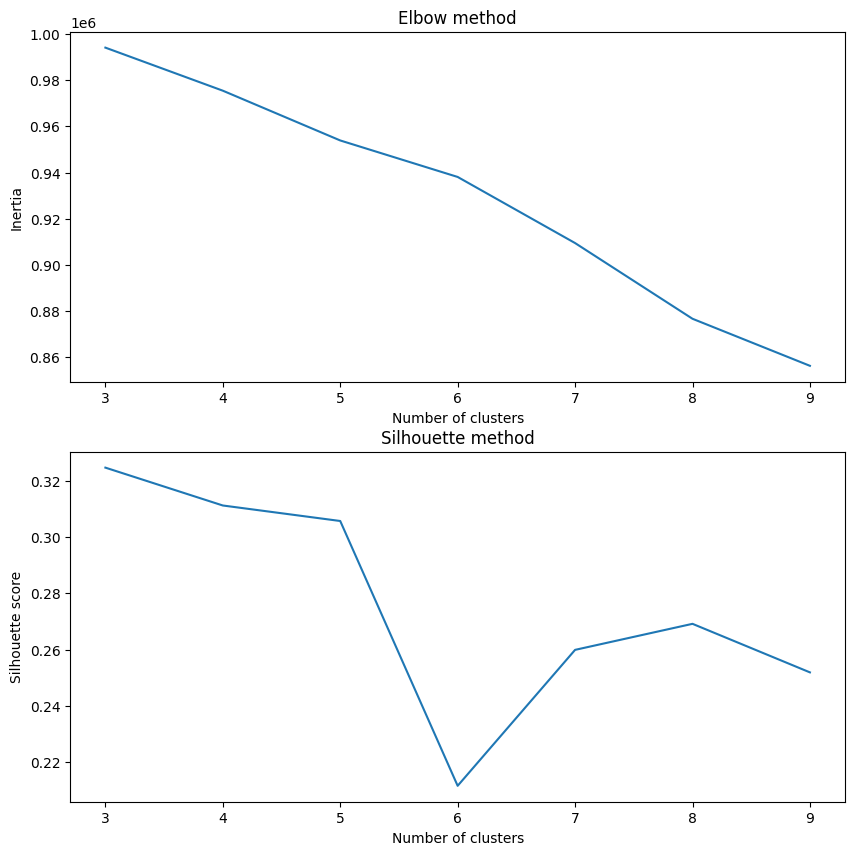

minimal inertia at 9 clusters


In [8]:
# Задание 4.5
# 1. Мы выделили девять кластеров, но, возможно, это далеко не оптимальное количество. Давайте попробуем применить разные методы для нахождения числа кластеров
# Будем выбирать количество кластеров из диапазона от 3 до 9
# Для начала примените метод локтя. Каким в этом случае будет оптимальное число кластеров? 
# Если оно не идентифицируется однозначно, запишите количество кластеров, при котором достигается наименьшая инерция
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

inertia = []
silhouette = []
for n in range(3, 10):
    inertia.append(get_inertia(n, X))
    silhouette.append(get_silhouette(n, X))
    
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
sns.lineplot(x=range(3, 10), y=inertia, ax=ax[0])
ax[0].set_title('Elbow method')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Inertia')

# 2. Теперь попробуйте подобрать оптимальное количество кластеров с помощью коэффициента силуэта. Каким оно будет?
# Если невозможно однозначно определить количество кластеров, при котором достигается максимальное значение коэффициента силуэта, 
# выберите наименьшее количество кластеров из подходящих
# Внимание: программа может выполняться несколько минут — будьте готовы подождать
sns.lineplot(x=range(3, 10), y=silhouette, ax=ax[1])
ax[1].set_title('Silhouette method')
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('Silhouette score')
plt.show()

print(f'minimal inertia at {list(range(3, 10))[inertia.index(min(inertia))]} clusters')

In [9]:
# Задание 4.6
# Мы будем использовать результаты, полученные в предыдущем задании с помощью коэффициента силуэта
# Реализуйте сегментацию подростков на выбранном количестве кластеров
# Для каждого кластера составьте топ-10 самых частых слов, назовём их ключевыми
# Для этого сгруппируйте данные по кластерам, в каждом кластере вычислите среднее по каждому признаку, отсортируйте данные по убыванию и выделите первые 10 строк
# Найдите среди ключевых слов те, которые характерны для каждого кластера, то есть встречаются в каждом из них
kmc_opt = KMeans(n_clusters=3, random_state=42)
kmc_opt.fit(X)
data['KMeans_cluster'] = kmc_opt.labels_
top = []
for cluster, group in data.groupby('KMeans_cluster'):
    top_ten = group.mean().sort_values(ascending=False).head(10).index
    top.append(set(top_ten))
set.intersection(*top)

{'dance', 'god', 'hair', 'music'}

In [10]:
# Задание 4.7
# Итак, с k-means мы потренировались — теперь перейдём к EM-алгоритму
# Реализуйте EM-алгоритм (GaussianMixture) для такого же количества кластеров, как и в предыдущем задании. В качестве значения параметра random_state возьмите число 42
# Сколько подростков алгоритм отнёс к самому многочисленному кластеру?
from sklearn.mixture import GaussianMixture
import numpy as np

emc = GaussianMixture(n_components=3, random_state=42)
emc.fit(X)
y = emc.predict(X)
np.unique(y, return_counts=True)

(array([0, 1, 2], dtype=int64), array([20670,  2874,  6456], dtype=int64))

In [11]:
np.where(kmc.labels_ == 6)

(array([14187], dtype=int64),)

In [12]:
# Задание 4.8
# В одном из кластеров оказался всего один человек. Давайте узнаем, что это за подросток и чем он(а) интересуется
# Отметьте три слова, которые чаще всего встречаются в сообщениях этого подростка:
data.iloc[14187].sort_values(ascending=False).head(3)

blonde    327
sex        22
hair       12
Name: 14187, dtype: int64

---

### 7. Итоговая практика по алгоритмам кластеризации

* `CUST_ID` — идентификационный номер держателя карты;
* `BALANCE` — баланс, доступный для совершения покупок;
* `BALANCEFREQUENCY` — как часто обновляется показатель баланса (1 — часто, 0 — нечасто);
* `PURCHASES` — количество покупок, оплаченных со счёта;
* `ONEOFFPURCHASES` — максимальная сумма единовременной покупки;
* `INSTALLMENTSPURCHASES` — сумма покупок, сделанных в рассрочку;
* `PURCHASESFREQUENCY` — как часто в целом совершаются покупки (1 — часто, 0 — нечасто);
* `ONEOFFPURCHASESFREQUENCY` — частота совершения единовременных покупок (1 — часто, 0 — нечасто);
* `PURCHASESINSTALLMENTSFREQUENCY` — частота совершения покупок в рассрочку (1 — часто, 0 — нечасто);
* `CASHADVANCEFREQUENCY` — частота внесения авансовых платежей;
* `CASHADVANCETRX` — количество транзакций с авансовыми взносами;
* `PURCHASESTRX` — количество совершённых транзакций с покупками;
* `CREDITLIMIT` — кредитный лимит держателя карты;
* `PAYMENTS` — сумма платежей пользователя;
* `MINIMUM_PAYMENTS` — сумма минимального платежа пользователя;
* `PRCFULLPAYMENT` — выплаченный процент от полного платежа;
* `TENURE` — срок обслуживания кредитной карты.

In [36]:
# Задание 7.2
# Теперь приступим к анализу данных. По традиции начнём его с проверки данных на наличие пропущенных значений. Сколько всего пропусков в данных?
df = pd.read_csv('data/CC GENERAL.csv')
df.isnull().sum().sum()

314

In [37]:
# Задание 7.3
# Заполните все пропуски средними арифметическими для признаков
df = df.fillna(df.mean(numeric_only=True))

# Каким будет среднее арифметическое для признака MINIMUM_PAYMENTS (если считать после заполнения пропущенных значений)? 
# Округлите результат до двух знаков после точки-разделителя
round(df['MINIMUM_PAYMENTS'].mean(), 2)

864.21

In [38]:
# Задание 7.4
# Теперь нормализуйте данные с помощью StandardScaler()
X = df.drop('CUST_ID', axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Для получившейся матрицы нормализованных признаков выведите самое первое значение в самой первой строке (X_norm[0][0]). Округлите до двух знаков после точки-разделителя
# Не забудьте предварительно удалить признак CUST_ID — он не поможет при кластеризации, так как не несёт никакой содержательной информации
round(X[0][0], 2)

-0.73

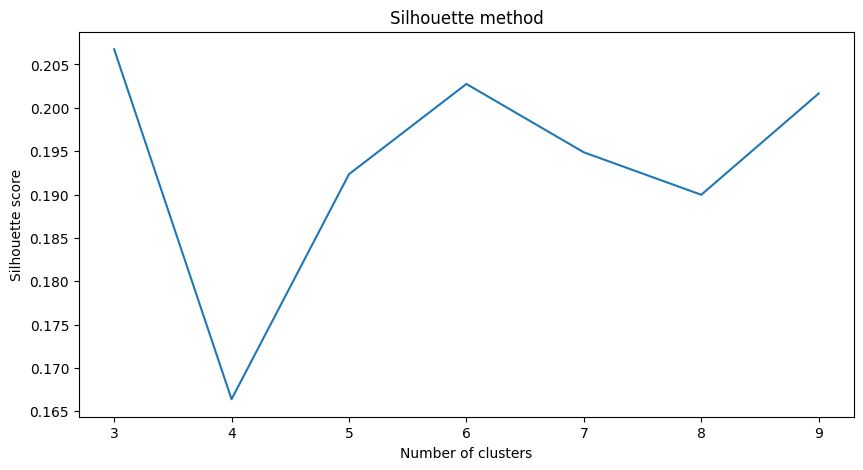

In [46]:
# Задание 7.5
# Теперь можем приступать к кластеризации. Начнём с самого простого и популярного метода — k-means
# Для того чтобы его применить, необходимо узнать число кластеров. Наилучший способ сделать это — применить коэффициент силуэта
# Найдите с его помощью оптимальное количество кластеров, перебрав диапазон от 2 до 9 включительно
# В этом и следующем заданиях для параметра random_state возьмём значение 42
silhouette = []
for n in range(3, 10):
    silhouette.append(get_silhouette(n, X))
    
_, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=range(3, 10), y=silhouette)
ax.set_title('Silhouette method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette score')
plt.show()

In [48]:
# Задание 7.6
# Теперь реализуем непосредственно кластеризацию k-means с оптимальным количеством кластеров, которое мы определили в предыдущем задании
kmc = KMeans(n_clusters=3, random_state=42)
kmc.fit(X)

# Сколько человек оказалось в самой малочисленной группе?
pd.Series(kmc.labels_).value_counts()

1    4559
2    3150
0    1241
Name: count, dtype: int64

In [57]:
# Задание 7.7
# Попробуем применить DBSCAN. Для начала реализуйте его с параметрами по умолчанию
from sklearn.cluster import DBSCAN

dbsc = DBSCAN()
dbsc.fit(X)

# Сколько кластеров было выделено?
pd.Series(dbsc.labels_).unique()

array([ 0, -1, 21,  1,  2,  8, 19,  3,  4,  5,  6,  7, 16,  9, 10, 11, 12,
       14, 13, 15, 36, 33, 29, 17, 18, 20, 27, 26, 30, 28, 34, 22, 23, 24,
       32, 25, 37, 31, 35], dtype=int64)

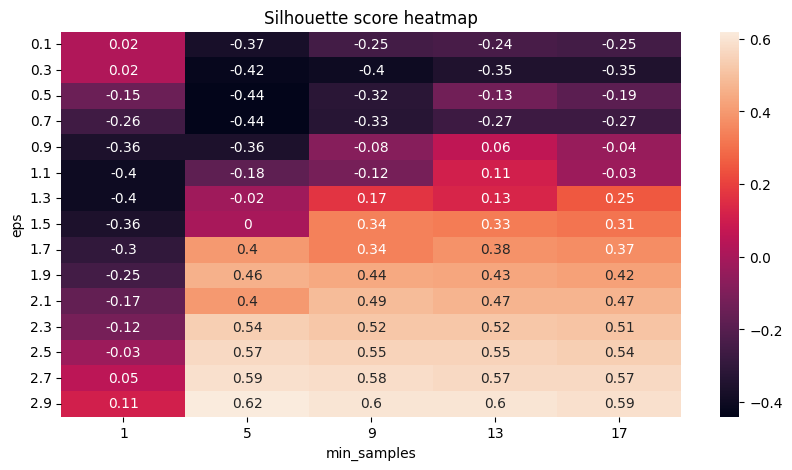

In [77]:
# Задание 7.8
# В предыдущем задании получилось очень много кластеров
# Возможно, это случилось потому, что мы взяли параметры по умолчанию, а результат алгоритма DBSCAN, как вы помните, очень чувствителен к ним
# Давайте попробуем с помощью цикла перебрать параметр eps по значениям, заданным как np.arange(0.1,3,0.2), 
# а параметр min_samples — по значениям, заданным как range(1,20,4). Найдите комбинацию, которая даёт максимальное значение коэффициента силуэта
def get_silhouette_dbsc(eps, min_samples, X):
    dbsc = DBSCAN(eps=eps, min_samples=min_samples)
    dbsc.fit(X)
    silhouette = silhouette_score(X, dbsc.labels_)
    return silhouette

silhouettes = pd.DataFrame()
for i, eps in enumerate(np.arange(0.1,3,0.2)):
    for j, min_samples in enumerate(range(1,20,4)):
        silhouettes.loc[eps, min_samples] = get_silhouette_dbsc(eps, min_samples, X)
        
fig, ax = plt.subplots(figsize=(10, 5))
fig = sns.heatmap(np.round(silhouettes, 2), annot=True)
ax.set_title('Silhouette score heatmap')
ax.set_xlabel('min_samples')
ax.set_ylabel('eps')
ax.set_yticklabels(np.round(silhouettes.index, 2), rotation=0)
plt.show()

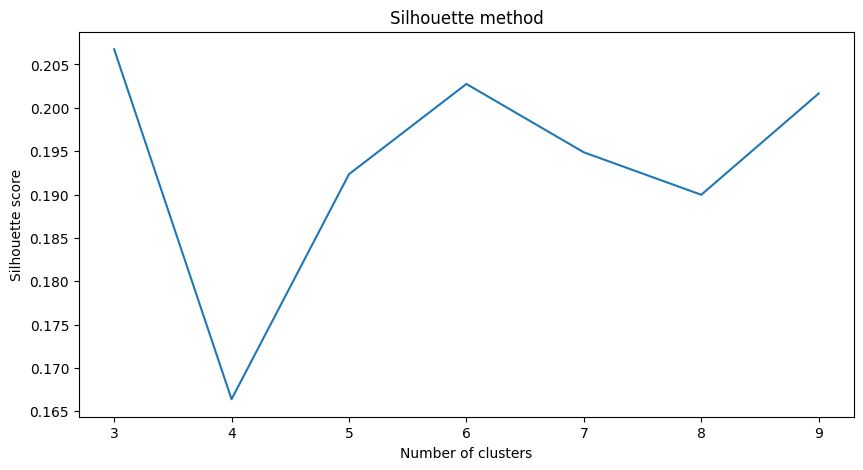

In [78]:
# Задание 7.9
# Теперь давайте реализуем агломеративную иерархическую кластеризацию
# Переберите количество кластеров в диапазоне от 3 до 9 включительно и найдите то их число, которое будет давать максимальный коэффициент силуэта
from sklearn.cluster import AgglomerativeClustering

def get_silhouette_agc(n_clusters, X):
    agc = AgglomerativeClustering(n_clusters=n_clusters)
    agc.fit(X)
    silhouette = silhouette_score(X, agc.labels_)
    return silhouette

silhouette = []
for n in range(3, 10):
    silhouette.append(get_silhouette(n, X))
    
_, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=range(3, 10), y=silhouette)
ax.set_title('Silhouette method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette score')
plt.show()

In [80]:
# Задание 7.10
# Сколько будет наблюдений в самом многочисленном классе, если мы обучим на наших данных модель агломеративной иерархической кластеризации 
# с количеством кластеров, полученным в предыдущем задании?
agc = AgglomerativeClustering(n_clusters=6)
agc.fit(X)
pd.Series(agc.labels_).value_counts()

0    3946
1    2931
2     864
5     722
3     464
4      23
Name: count, dtype: int64

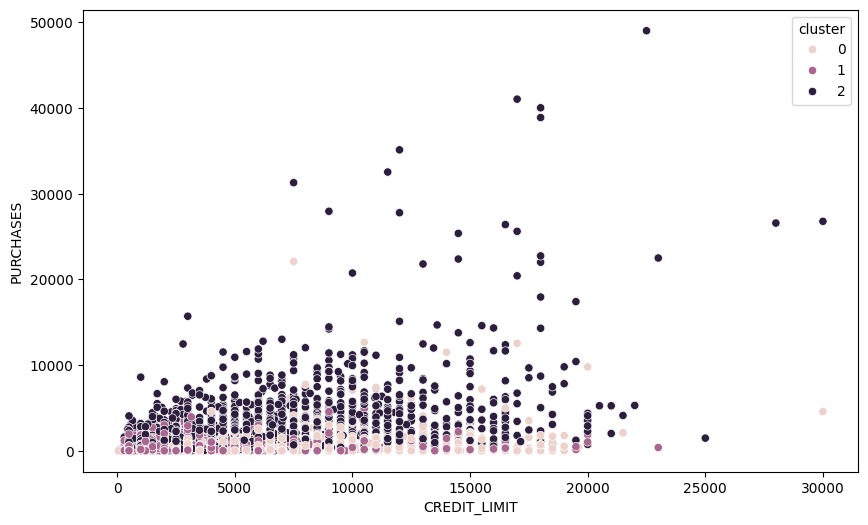

In [81]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
df['cluster'] = kmeans.labels_
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster')
plt.show()